# \[KAN\] Example

SEOYEON CHOI  
2024-07-13

ref: [1](https://ddangchani.github.io/KAN/)

# Import

In [27]:
import pandas as pd

import kan
import matplotlib.pyplot as plt
import numpy as np
import torch
from kan import KAN, create_dataset
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split

# Data

In [38]:
iris = load_iris()

# KAN

## Symbolic regression

특정 함수로 표현 가능 $\rightarrow$ 아핀 변환으로 고정 $\rightarrow$
파라메터 수 줄이기 가능 $\rightarrow$ 재학습

In [207]:
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)

In [208]:
torch.manual_seed(0)
X = torch.rand(1000, 2) * 2 - 1 # Random points in [-1, 1]^2
y = f(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
dataset = dict(train_input=X_train, train_label=y_train, test_input=X_test, test_label=y_test)

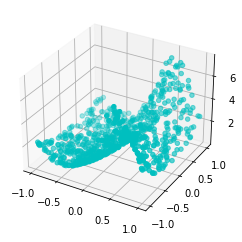

In [209]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['train_input'][:, 0], dataset['train_input'][:, 1], dataset['train_label'], c='c', marker='o')
plt.show()

In [210]:
model = KAN(width=[2,5,1], grid=3, k=3, seed=0)

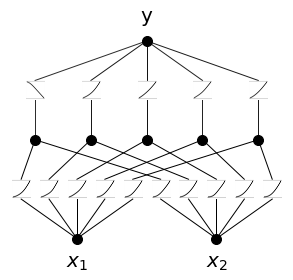

In [211]:
model(dataset['train_input'])
model.plot(beta=100, in_vars=['$x_1$', '$x_2$'], out_vars=['y']) # beta controls the transparency of the plot

In [212]:
res = model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

train loss: 1.09e-01 | test loss: 9.79e-02 | reg: 2.11e+01 : 100%|██| 20/20 [00:04<00:00,  4.61it/s]

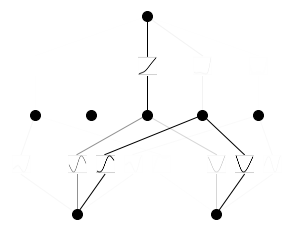

In [213]:
model.plot()

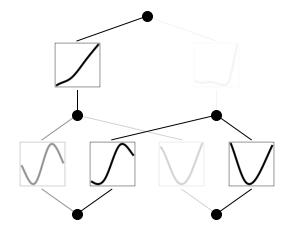

In [214]:
model2 = model.prune()
model2(dataset['train_input'])
model2.plot()

In [215]:
model2.suggest_symbolic(0,0,0) 

function , r2
sin , 0.9966473579406738
gaussian , 0.9244089722633362
tanh , 0.8837200999259949
sigmoid , 0.8783647418022156
arctan , 0.8637073636054993

## ecg

## Classification

## iris data

In [143]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder() 

# Iris dataset
iris = load_iris()
X = torch.tensor(iris.data, dtype=torch.float32)
y = enc.fit_transform(iris.target.reshape(-1, 1)).toarray()
y = torch.tensor(y, dtype=torch.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
dataset = dict(train_input=X_train, train_label=y_train, test_input=X_test, test_label=y_test)

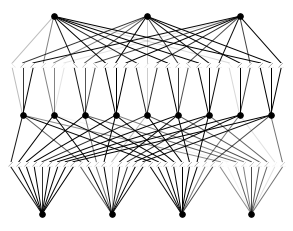

In [144]:
# Create KAN
model = KAN(width=[4,9,3], grid=3, k=3, seed=0)
model(X_train)
model.plot()

train loss: 2.88e-01 | test loss: 2.52e-01 | reg: 6.61e+01 : 100%|██| 20/20 [00:08<00:00,  2.35it/s]

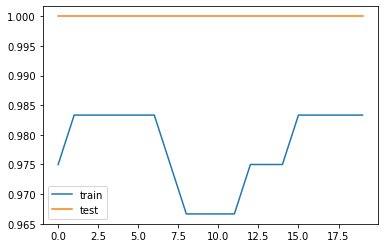

In [145]:
# Train KAN
from sklearn.metrics import accuracy_score

def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == torch.argmax(dataset['train_label'], dim=1)).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == torch.argmax(dataset['test_label'], dim=1)).float())

res = model.train(dataset, opt="LBFGS", metrics=[train_acc, test_acc], steps=20, lamb=0.01, lamb_entropy=10., loss_fn=torch.nn.CrossEntropyLoss())

# Accuracy plot
fig, ax = plt.subplots()
ax.plot(res["train_acc"], label="train")
ax.plot(res["test_acc"], label="test")
ax.legend()
plt.show()